In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [15]:
# education_great_18 = pd.read_csv('vote05_2022_1.csv')
# education_18_24 = pd.read_csv('vote05_2022_2.csv')
# education_25_44 = pd.read_csv('vote05_2022_3.csv')
# education_45_64 = pd.read_csv('vote05_2022_4.csv')
# education_65_75 = pd.read_csv('vote05_2022_5.csv')
# education_great_75 = pd.read_csv('vote05_2022_6.csv')

# # List of all DataFrames
# dfs = [education_great_18, education_18_24, education_25_44, education_45_64, education_65_75, education_great_75]

# # Ensure all columns with numerical values are converted to numeric (removing commas if necessary)
# for df in dfs:
#     df.iloc[:, 1:] = df.iloc[:, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# # Add the DataFrames together by summing them
# summed_data = dfs[0].copy()  # Start with the first DataFrame as the base
# summed_data.iloc[:, 1:] = sum(df.iloc[:, 1:] for df in dfs)

# # Display the summed DataFrame
# summed_data.head()

# pd.set_option('display.max_rows', None)  # Show all rows
# print(summed_data)



education_great_18 = pd.read_csv('vote05_2022_1.csv')
education_18_24 = pd.read_csv('vote05_2022_2.csv')
education_25_44 = pd.read_csv('vote05_2022_3.csv')
education_45_64 = pd.read_csv('vote05_2022_4.csv')
education_65_75 = pd.read_csv('vote05_2022_5.csv')
education_great_75 = pd.read_csv('vote05_2022_6.csv')

# List of all DataFrames
dfs = [education_great_18, education_18_24, education_25_44, education_45_64, education_65_75, education_great_75]

# Ensure all columns with numerical values are converted to numeric (removing commas if necessary)
for df in dfs:
    df.iloc[:, 1:] = df.iloc[:, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Combine all DataFrames by summing them
combined_data = pd.concat(dfs)

# Group by 'Characteristics' and sum all numerical columns
summed_data = combined_data.groupby('Characteristics', as_index=False).sum()

# Display the summed DataFrame
pd.set_option('display.max_rows', None)  # Show all rows
summed_data.head()


,Characteristics,Total population,Total citizen population,Reported registered,Reported not registered,No response to registration1,Reported voted,Reported not voted,No response to voting2,Reported registered percent,Reported voted percent
0,"9th to 12th grade, no diploma",58083,48378,21611,15357,11410,12947,24819,10617,742.2,470.2
1,Advanced degree,135573,124103,101559,5712,16832,88162,19081,16857,1316.9,1151.6
2,Bachelor's degree,227564,212768,167227,14805,30736,136761,44802,31205,1318.8,1092.9
3,High school graduate,294088,268896,159079,56308,53509,108765,109482,50651,1009.8,710.9
4,Less than 9th grade,34066,18690,7574,6725,4392,4417,10161,4116,406.9,237.8


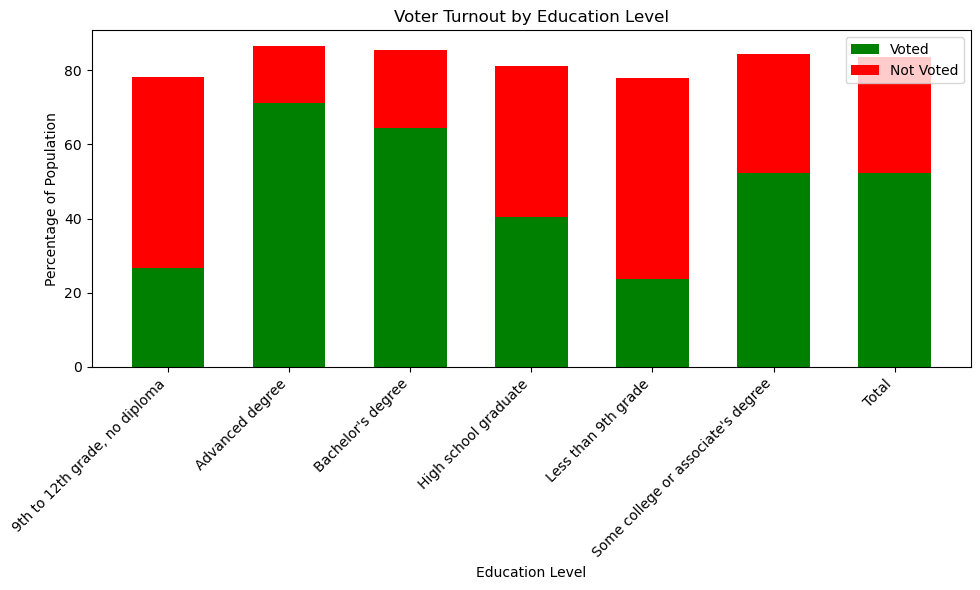

In [21]:

# import numpy as np
# import pandas as pd

# # Ensure all numerical columns are properly handled
# summed_data["Reported registered percent"] /= 100
# summed_data["Reported voted percent"] /= 100

# # Define Z-score for a 95% CI
# z = 1.96

# # Replace NaN or non-numeric values in "Total population" with 0 to avoid issues
# summed_data["Total population"] = pd.to_numeric(summed_data["Total population"], errors='coerce').fillna(0)

# # Calculate confidence intervals for "Reported registered percent"
# summed_data["registered_se"] = np.sqrt(
#     (summed_data["Reported registered percent"] * (1 - summed_data["Reported registered percent"])) /
#     summed_data["Total population"].replace(0, np.nan)  # Avoid division by zero
# )
# summed_data["registered_ci_lower"] = summed_data["Reported registered percent"] - z * summed_data["registered_se"]
# summed_data["registered_ci_upper"] = summed_data["Reported registered percent"] + z * summed_data["registered_se"]

# # Calculate confidence intervals for "Reported voted percent"
# summed_data["voted_se"] = np.sqrt(
#     (summed_data["Reported voted percent"] * (1 - summed_data["Reported voted percent"])) /
#     summed_data["Total population"].replace(0, np.nan)  # Avoid division by zero
# )
# summed_data["voted_ci_lower"] = summed_data["Reported voted percent"] - z * summed_data["voted_se"]
# summed_data["voted_ci_upper"] = summed_data["Reported voted percent"] + z * summed_data["voted_se"]

# # Display results
# ci_columns = [
#     "Characteristics",
#     "Reported registered percent", "registered_ci_lower", "registered_ci_upper",
#     "Reported voted percent", "voted_ci_lower", "voted_ci_upper"
# ]
# print(summed_data[ci_columns])
# summed_data.head()
df = pd.DataFrame(summed_data)

# Calculate percentages
df["Voted Percent"] = (df["Reported voted"] / df["Total citizen population"]) * 100
df["Not Voted Percent"] = (df["Reported not voted"] / df["Total citizen population"]) * 100

# Visualization: Stacked bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.6
index = range(len(df["Characteristics"]))

# Stacked bar
plt.bar(index, df["Voted Percent"], label="Voted", width=bar_width, color="green")
plt.bar(index, df["Not Voted Percent"], label="Not Voted", width=bar_width, bottom=df["Voted Percent"], color="red")

# Add labels and title
plt.xticks(index, df["Characteristics"], rotation=45, ha="right")
plt.ylabel("Percentage of Population")
plt.xlabel("Education Level")
plt.title("Voter Turnout by Education Level")
plt.legend()

# Display chart
plt.tight_layout()
plt.show()



ANOVA F-statistic: nan, P-value: nan


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/var/folders/nt/6nrb_d696ylb20nhdcw60rfc0000gn/T/ipykernel_1151/1915341423.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(*groups)


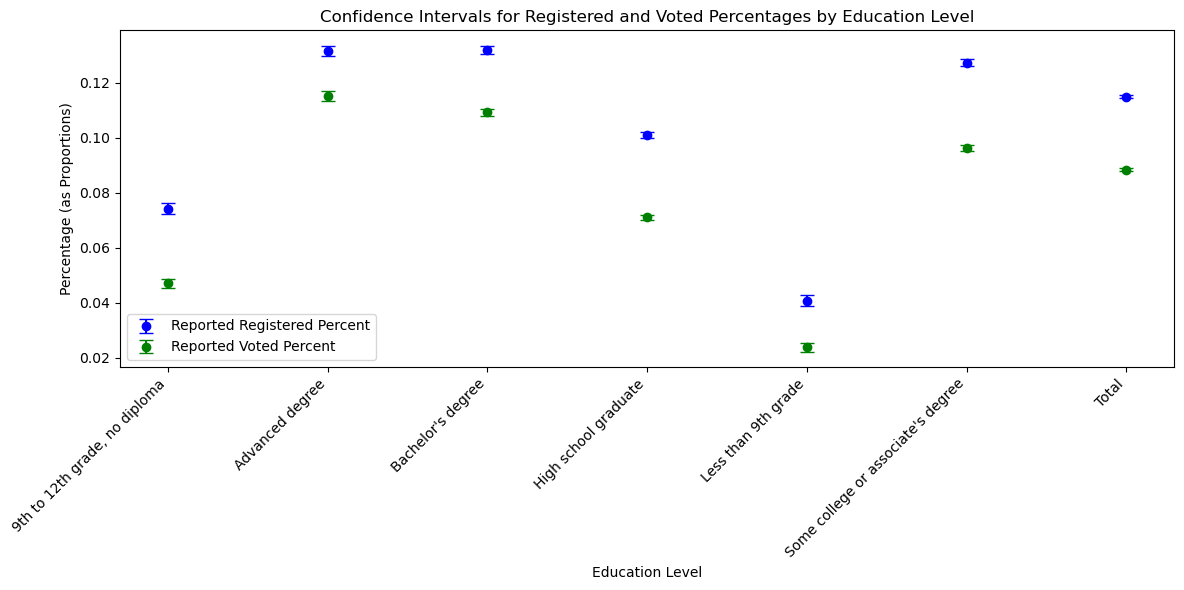

In [20]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot for "Reported registered percent"
plt.errorbar(
    summed_data["Characteristics"],
    summed_data["Reported registered percent"],
    yerr=[
        summed_data["Reported registered percent"] - summed_data["registered_ci_lower"],
        summed_data["registered_ci_upper"] - summed_data["Reported registered percent"],
    ],
    fmt='o',
    capsize=5,
    label="Reported Registered Percent",
    color='blue'
)

# Plot for "Reported voted percent"
plt.errorbar(
    summed_data["Characteristics"],
    summed_data["Reported voted percent"],
    yerr=[
        summed_data["Reported voted percent"] - summed_data["voted_ci_lower"],
        summed_data["voted_ci_upper"] - summed_data["Reported voted percent"],
    ],
    fmt='o',
    capsize=5,
    label="Reported Voted Percent",
    color='green'
)

# Add labels, legend, and title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel("Education Level")
plt.ylabel("Percentage (as Proportions)")
plt.title("Confidence Intervals for Registered and Voted Percentages by Education Level")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# import numpy as np
# import matplotlib.pyplot as plt

# # Set up the data
# x_labels = summed_data["Characteristics"]
# x_indices = np.arange(len(x_labels))  # Numeric positions for each label
# bar_width = 0.4  # Width of the bars

# # Convert percentages to proportions for better scaling
# registered_means = summed_data["Reported registered percent"]
# voted_means = summed_data["Reported voted percent"]

# # Calculate the error margins
# registered_errors = [
#     registered_means - summed_data["registered_ci_lower"],
#     summed_data["registered_ci_upper"] - registered_means,
# ]
# voted_errors = [
#     voted_means - summed_data["voted_ci_lower"],
#     summed_data["voted_ci_upper"] - voted_means,
# ]

# # Create the plot
# plt.figure(figsize=(14, 6))

# # Bar for "Reported registered percent"
# plt.bar(
#     x_indices - bar_width / 2,
#     registered_means,
#     bar_width,
#     label="Reported Registered Percent",
#     yerr=registered_errors,
#     capsize=5,
#     color="blue",
#     alpha=0.7,
# )

# # Bar for "Reported voted percent"
# plt.bar(
#     x_indices + bar_width / 2,
#     voted_means,
#     bar_width,
#     label="Reported Voted Percent",
#     yerr=voted_errors,
#     capsize=5,
#     color="green",
#     alpha=0.7,
# )

# # Add labels, title, and legend
# plt.xticks(x_indices, x_labels, rotation=45, ha="right")  # Rotate x-axis labels
# plt.xlabel("Education Level")
# plt.ylabel("Percentage (as Proportions)")
# plt.title("Confidence Intervals for Registered and Voted Percentages by Education Level")
# plt.legend()
# plt.tight_layout()

# # Show the plot
# plt.show()
